# Task 3 - Decision Trees

#### Imports

In [ ]:
import numpy as np                                              # For general array handling
import pandas as pd                                             # For loading, manipulating and printing the dataframe
import matplotlib.pyplot as plt                                 # Plotting the label distribution in the dataset
from sklearn import metrics as sm                               # To calculate the metrics of the model
from sklearn.model_selection import KFold                       # To perform splitting of the dataset as part of the K-Fold cross validation task
from sklearn.tree import DecisionTreeClassifier as DTC          # sklearn decision tree classifier class
from sklearn.preprocessing import MultiLabelBinarizer as MLB    # sklearn multi label binarizer class to return one hot encodings of labels

### Data preprocessing
#### Loading data and modifying the labels of the data according to the need
## Task 3.1 - Data Exploration

In [ ]:
df = pd.read_csv('advertisement.csv')

# The labels are given as space-separated strings
# They are first split and then are sorted in alphabetical order
df['labels'] = [sorted(label.split()) for label in df['labels'].values]

df = df.sample(frac=1, ignore_index=True)   # Randomly shuffling the dataset such that the indices are not modified

### Dataset visualization

In [ ]:
display(df)

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,64,Male,43868.077360,PhD,True,0,South Shannonshire,Scientist,127.228636,mobile,"[electronics, furniture]"
1,34,Male,54599.183571,High School,True,1,Austinview,HR,73.152606,novel,[books]
2,54,Female,41498.105485,Bachelor,True,2,Graychester,Artist,71.963014,perfume,"[beauty, books, clothing, furniture, home]"
3,64,Male,43973.550085,Master,True,1,South Erica,Salesman,82.244693,shirt,"[clothing, electronics, home]"
4,45,Female,41053.284516,Bachelor,True,1,New Scottville,HR,81.745685,mobile,"[clothing, electronics, furniture, home]"
...,...,...,...,...,...,...,...,...,...,...,...
995,20,Male,52420.801936,Bachelor,True,2,Jacksonville,Housewife,64.510070,gloves,"[clothing, electronics, furniture, home, sports]"
996,33,Male,38307.755250,Bachelor,True,3,Davidhaven,HR,98.956959,chips,"[books, food, home]"
997,21,Female,40825.926906,Bachelor,True,2,Port Georgeview,HR,85.205083,perfume,"[beauty, books, clothing, electronics, food]"
998,58,Female,53062.402456,High School,False,0,North Anthonyberg,Lawyer,73.696889,shoes,"[beauty, books, clothing, sports]"


### Data exploration and visualization
#### Obtaining the list of all individual labels and not as a list

In [ ]:
labels = df['labels'].values

labels_list = []
for i in labels:
    for j in i:
        labels_list.append(j)

labels = np.array(labels_list)

#### Sorting the labels in descending order of their frequencies

In [ ]:
label_freq = {}
for label in labels:
    if label in label_freq:
        label_freq[label] += 1
    else:
        label_freq[label] = 1
label_freq = dict(sorted(label_freq.items(), key=lambda x: x[1], reverse=True))

### Data visualization

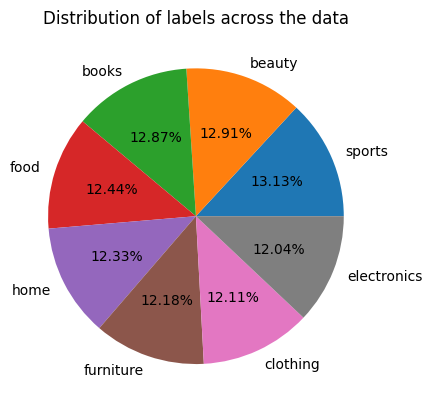

In [ ]:
labels_list = list(label_freq.keys())
frequencies = list(label_freq.values())

plt.pie(frequencies, labels=labels_list, autopct='%1.2f%%') # Plotting the percentages of the labels in the dataset upto 2 decimal points of precision
plt.title('Distribution of labels across the data')
plt.show()

### Data featurization

#### Adding the one hot encodings of the features of the data points and removing the columns themselves
#### This is done only to categorical columns/features to convert them to numerical columns/features

In [ ]:
categorical_features = ["gender", "education", "married", "city", "occupation", "most bought item"]

for category in categorical_features:
    one_hot = pd.get_dummies(df[category])  # One hot encoding is generated such that the record contains 1 in a column only if
                                            # the value of that feature of that record is same as the value of the column
    df = df.drop(category, axis=1)          # Dropping/removing this column from the dataset
    df = df.join(one_hot)                   # Adding all the columns from the one-hot encoding to the dataset at the end

# Shifting the labels to be at the end of the dataset
# Just for convenience and conventional purposes
labels = df['labels']
df = df.drop('labels', axis=1)
df = df.join(labels)

In [ ]:
display(df)

,age,income,children,purchase_amount,Female,Male,Bachelor,High School,Master,PhD,...,mobile,monitor,novel,pants,perfume,shirt,shoes,sofa,table,labels
0,64,43868.077360,0,127.228636,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,"[electronics, furniture]"
1,34,54599.183571,1,73.152606,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,[books]
2,54,41498.105485,2,71.963014,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,"[beauty, books, clothing, furniture, home]"
3,64,43973.550085,1,82.244693,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,"[clothing, electronics, home]"
4,45,41053.284516,1,81.745685,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,"[clothing, electronics, furniture, home]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20,52420.801936,2,64.510070,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[clothing, electronics, furniture, home, sports]"
996,33,38307.755250,3,98.956959,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[books, food, home]"
997,21,40825.926906,2,85.205083,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,"[beauty, books, clothing, electronics, food]"
998,58,53062.402456,0,73.696889,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,"[beauty, books, clothing, sports]"


#### Data featurization for the multi output and powerset classifiers

In [ ]:
# List of all unique features
unique_labels = sorted(list(set(labels_list)))

# Power set of all unique features
power_set=[()]
for label in unique_labels:
    temp_list = []
    for sub_set in power_set:
        temp_list += [sorted(list(sub_set) + [label])]      # Sorting is done to ensure that the labels are in alphabetical order
    temp_list = [tuple(i) for i in temp_list]               # The lists are converted to tuples so as to simplify the conversion of labels to one-hot encodings
                                                            # by the Multi Label Binarizer class
    power_set += temp_list
power_set = sorted(power_set, key=lambda x: (len(x), x))    # Sorted by length of the subset and then the elements of the subset. This is done to ensure
                                                            # that the power set is created similar to the convention of how we write a power set

#### One-hot encoding of the labels for the Multi Output formulation decision tree classifier

In [ ]:
multi_output_binarizer = MLB(classes=unique_labels) # Classes parameter specifies the order in which each of the features of the labels are to be placed while performing one-hot encoding

# This function converts each of the labels to one-hot encodings based on the already initialised classes attribute
multi_output_one_hot = multi_output_binarizer.fit_transform(df['labels'].values)

#### One-hot encoding of the labels for the Power Set formulation decision tree classifier

In [ ]:
# The MLB class expects a list of lists where each element must be hashable. Hence, the labels are converted to tuples and also
# sorted to ensure that the labels are in alphabetical order just to preserve the convention of order of power sets
power_set_labels = [[tuple(sorted(i))] for i in df['labels'].values]

# The previously initialised power set is used to specify the order in which each tuple of labels are to be placed while performing one-hot encoding
power_set_binarizer = MLB(classes=power_set)

# This function converts each tuple of labels to one-hot encodings based on the already initialised classes attribute
power_set_one_hot = power_set_binarizer.fit_transform(power_set_labels)

### Train Validation splitting of the dataset

In [ ]:
X_data = np.array(df.iloc[:])[:, :-1]           # df.iloc[:] is used to extract all rows of the dataset after which we consider all columns
                                                # except the last column which contains the labels

train_validation_split = int(0.8 * len(X_data)) # 80-20 train validation split of the dataset

X_train = X_data[:train_validation_split]       # First 80% of the shuffled dataset
X_validation = X_data[train_validation_split:]  # Last  20% of the shuffled dataset

Y_train_multi_output = multi_output_one_hot[:train_validation_split]        # First 80% of the multi output one hot encoded labels
Y_validation_multi_output = multi_output_one_hot[train_validation_split:]   # Last  20% of the multi output one hot encoded labels

Y_train_power_set = power_set_one_hot[:train_validation_split]              # First 80% of the power set one hot encoded labels
Y_validation_power_set = power_set_one_hot[train_validation_split:]         # Last  20% of the power set one hot encoded labels

# Temporary lists to keep track of these splits later onso that they can be reset to their original values
[temp_X_train, temp_X_validation] = [X_train, X_validation]
[temp_Y_train_multi_output, temp_Y_validation_multi_output] = [Y_train_multi_output, Y_validation_multi_output]
[temp_Y_train_power_set, temp_Y_validation_power_set] = [Y_train_power_set, Y_validation_power_set]

## Task 3.3 - MultiLabel Classification
### Task 3.3.1.2 - Multi Output Formulation

In [ ]:
class DTC_Multi_Output():
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.DTC = DTC(max_depth=max_depth, max_features=max_features, criterion=criterion)
        
        self.X_train = X_train
        self.Y_train = Y_train_multi_output
        
        self.X_validation = X_validation
        self.Y_validation = Y_validation_multi_output

        self.__train()

    # Training method
    def __train(self):
        self.DTC.fit(self.X_train, self.Y_train)

    # Validation method
    def inference(self):
        return self.DTC.predict(X_validation)

#### Helper function to print metrics

In [ ]:
# Function to print the metrics in a table format
def printMetrics(metrics_values):
    metrics_list = ['Accuracy', 'Macro F-1 score', 'Micro F-1 score', 'Weighted F-1 score', 'Precision', 'Recall']
    table_list = []

    for i in range(len(metrics_list)):
        table_list.append([metrics_list[i], metrics_values[i]])

    # Printing the metrics in a table format after removing the index column
    df = pd.DataFrame(table_list, columns=['Metric', 'Value'])
    display(df.style.hide(axis='index'))

#### Prediction of labels using the multi output formulation decision tree classifier

In [ ]:
multi_output_DTC = DTC_Multi_Output()
multi_output_inference = multi_output_DTC.inference()

Y_validation_multi_output_numerical = []
multi_output_inference_numerical    = []

# Converting the one-hot encoded labels to their numerical values so that they can be passed to the sklearn confusion matrix metric
# This conversion is just a simple binary to decimal conversion

for i in Y_validation_multi_output:
    num, power = 0, 0
    for j in i[::-1]:
        num += j * (2 ** power)
    Y_validation_multi_output_numerical.append(num)

for i in multi_output_inference:
    num, power = 0, 0
    for j in i[::-1]:
        num += j * (2 ** power)
    multi_output_inference_numerical.append(num)

#### Multi output formulation classifier metrics

In [ ]:
accuracy          = sm.accuracy_score( Y_validation_multi_output, multi_output_inference)
macro_f1_score    = sm.f1_score(       Y_validation_multi_output, multi_output_inference, average='macro')
micro_f1_score    = sm.f1_score(       Y_validation_multi_output, multi_output_inference, average='micro')
weighted_f1_score = sm.f1_score(       Y_validation_multi_output, multi_output_inference, average='weighted')
precision         = sm.precision_score(Y_validation_multi_output, multi_output_inference, average='macro', zero_division=0)
recall            = sm.recall_score(   Y_validation_multi_output, multi_output_inference, average='macro', zero_division=0)

metrics_values = [accuracy, macro_f1_score, micro_f1_score, weighted_f1_score, precision, recall]
printMetrics(metrics_values)

matrix = sm.confusion_matrix(Y_validation_multi_output_numerical, multi_output_inference_numerical)
print(matrix)
print(matrix.shape)

Metric,Value
Accuracy,0.035000
Macro F-1 score,0.503111
Micro F-1 score,0.504171
Weighted F-1 score,0.503906
Precision,0.540762
Recall,0.470916


[[ 3  5 13  1  2  0  0]
 [ 8 24 12  6  3  1  0]
 [ 9 29 22  8  1  0  0]
 [ 4 11  9  6  1  1  0]
 [ 5 11  1  0  0  1  0]
 [ 0  1  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]]
(7, 7)


### Task 3.3.1.1 - Power Set Formulation

In [ ]:
class DTC_Power_Set():
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.DTC = DTC(max_depth=max_depth, max_features=max_features, criterion=criterion)
        
        self.X_train = X_train
        self.Y_train = Y_train_power_set
        
        self.X_validation = X_validation
        self.Y_validation = Y_validation_power_set

        self.__train()

    # Training method
    def __train(self):
        self.DTC.fit(self.X_train, self.Y_train)

    # Validation method
    def inference(self):
        return self.DTC.predict(X_validation)

#### Prediction of labels using the power set formulation decision tree classifier

In [ ]:
power_set_DTC = DTC_Power_Set()
power_set_inference = power_set_DTC.inference()

Y_validation_power_set_numerical = []
power_set_inference_numerical    = []

# Converting the one-hot encoded labels to their numerical values so that they can be passed to the sklearn confusion matrix metric
# This conversion is just finding the index where the encoding contains a 1

for i in Y_validation_power_set:
    for j in range(len(i)):
        if i[j]:
            Y_validation_power_set_numerical.append(j + 1)    

for i in power_set_inference:
    for j in range(len(i)):
        if i[j]:
            power_set_inference_numerical.append(j + 1)

#### Power set formulation classifier metrics

In [ ]:
accuracy          = sm.accuracy_score( Y_validation_power_set, power_set_inference)
macro_f1_score    = sm.f1_score(       Y_validation_power_set, power_set_inference, average='macro',    zero_division=0)
micro_f1_score    = sm.f1_score(       Y_validation_power_set, power_set_inference, average='micro',    zero_division=0)
weighted_f1_score = sm.f1_score(       Y_validation_power_set, power_set_inference, average='weighted', zero_division=0)
precision         = sm.precision_score(Y_validation_power_set, power_set_inference, average='macro',    zero_division=0)
recall            = sm.recall_score(   Y_validation_power_set, power_set_inference, average='macro',    zero_division=0)

metrics_values = [accuracy, macro_f1_score, micro_f1_score, weighted_f1_score, precision, recall]
printMetrics(metrics_values)

matrix = sm.confusion_matrix(Y_validation_power_set_numerical, power_set_inference_numerical)
print(matrix)
print(matrix.shape)

Metric,Value
Accuracy,0.035000
Macro F-1 score,0.007574
Micro F-1 score,0.035000
Weighted F-1 score,0.032000
Precision,0.008371
Recall,0.008138


[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(148, 148)


## Task 3.4 - Hyperparameter Tuning

In [ ]:
criteria = ['gini', 'entropy']
max_depths = [3, 5, 10, 20, 30]
max_features = [3, 5, 7, 9, 11]

#### Tasks 3.4.1.1 and 3.4.1.2 - Multi Output formulation classifier metrics and 3 best performing hyperparameter triplets
## Assumption in tiebreaking for best hyperparamters:
- First sorted in decreasing order of `Macro f1 score`, then `Micro f1 score`, then `Weighted f1 score` and finally `Accuracy`

In [ ]:
param_list_multi_output = []
multi_output_metrics = []

for criterion in criteria:
    for max_depth in max_depths:
        for max_feature in max_features:
            param_multi_output_DTC = DTC_Multi_Output(max_depth=max_depth, max_features=max_feature, criterion=criterion)
            param_multi_output_inference = param_multi_output_DTC.inference()

            # Converting the encodings to numerical form for calculating the confusion matrix
            param_multi_output_inference_numerical = []
            for i in param_multi_output_inference:
                num, power = 0, 0
                for j in i[::-1]:
                    num += j * (2 ** power)
                param_multi_output_inference_numerical.append(num)

            accuracy           =   sm.accuracy_score(  Y_validation_multi_output, param_multi_output_inference)
            f1_score_macro     =   sm.f1_score(        Y_validation_multi_output, param_multi_output_inference, average='macro')
            f1_score_micro     =   sm.f1_score(        Y_validation_multi_output, param_multi_output_inference, average='micro')
            f1_score_weighted  =   sm.f1_score(        Y_validation_multi_output, param_multi_output_inference, average='weighted')
            precision          =   sm.precision_score( Y_validation_multi_output, param_multi_output_inference, average='macro', zero_division=0)
            recall             =   sm.recall_score(    Y_validation_multi_output, param_multi_output_inference, average='macro', zero_division=0)
            matrix             =   sm.confusion_matrix(Y_validation_multi_output_numerical, param_multi_output_inference_numerical)

            param_list_multi_output.append((criterion, max_depth, max_feature, f1_score_macro, f1_score_micro, f1_score_weighted, accuracy))
            multi_output_metrics.append([criterion, max_depth, max_feature, accuracy, f1_score_macro, f1_score_micro, f1_score_weighted, precision, recall, matrix])

# Sorting the classifier based on descending order of macro f1 score, then micro f1 socre, then weighted f1 score and then accuracy
param_list_multi_output = sorted(param_list_multi_output, key=lambda x: tuple([x[3], x[4], x[5], x[6]]), reverse=True)
print(param_list_multi_output[:3])

for i in multi_output_metrics:
    metrics_values = i[:-1]
    printMetrics(metrics_values)
    print(i[-1])
    print(i[-1].shape)

[('gini', 30, 9, 0.25196106849959504, 0.26717557251908397, 0.2572177577874911, 0.01), ('gini', 30, 7, 0.2519229573047417, 0.25260416666666663, 0.2518395119440192, 0.02), ('gini', 20, 11, 0.23948041510298312, 0.24423337856173674, 0.23972844182692504, 0.01)]


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,5
Weighted F-1 score,0.015000
Precision,0.056122
Recall,0.073456


[[ 0  0  0  0  0  0  0  0]
 [21  3  0  0  0  0  0  0]
 [44 10  0  0  0  0  0  0]
 [65  4  0  0  0  0  0  0]
 [31  1  0  0  0  0  0  0]
 [14  4  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,7
Weighted F-1 score,0.025000
Precision,0.059017
Recall,0.063758


[[ 0  0  0  0  0  0  0  0]
 [19  5  0  0  0  0  0  0]
 [51  3  0  0  0  0  0  0]
 [62  7  0  0  0  0  0  0]
 [30  2  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,9
Weighted F-1 score,0.005000
Precision,0.021341
Recall,0.023973


[[ 0  0  0  0  0  0  0  0]
 [23  1  0  0  0  0  0  0]
 [52  2  0  0  0  0  0  0]
 [68  1  0  0  0  0  0  0]
 [30  2  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.032353
Recall,0.037225


[[ 0  0  0  0  0  0  0  0]
 [22  2  0  0  0  0  0  0]
 [53  1  0  0  0  0  0  0]
 [66  2  0  0  1  0  0  0]
 [29  3  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.027108
Recall,0.030717


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [52  2  0  0  0  0  0  0]
 [67  2  0  0  0  0  0  0]
 [28  4  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.032920
Recall,0.036975


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [53  0  1  0  0  0  0  0]
 [63  0  6  0  0  0  0  0]
 [30  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,11
Weighted F-1 score,0.005000
Precision,0.068063
Recall,0.074313


[[ 0  0  0  0  0  0  0  0]
 [20  4  0  0  0  0  0  0]
 [47  6  0  0  1  0  0  0]
 [57 10  0  2  0  0  0  0]
 [30  1  0  0  1  0  0  0]
 [14  3  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,3
Weighted F-1 score,0.005000
Precision,0.024289
Recall,0.027165


[[ 0  0  0  0  0  0  0  0]
 [23  1  0  0  0  0  0  0]
 [52  2  0  0  0  0  0  0]
 [67  1  0  0  0  1  0  0]
 [30  2  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,5
Weighted F-1 score,0.010000
Precision,0.032353
Recall,0.037415


[[ 0  0  0  0  0  0  0  0]
 [22  2  0  0  0  0  0  0]
 [51  3  0  0  0  0  0  0]
 [64  5  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.028902
Recall,0.030100


[[ 0  0  0  0  0  0  0  0]
 [23  0  1  0  0  0  0  0]
 [53  0  1  0  0  0  0  0]
 [66  0  1  0  0  0  1  1]
 [31  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.003333
Recall,0.003454


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [53  0  1  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,11
Weighted F-1 score,0.025000
Precision,0.082211
Recall,0.091803


[[ 0  0  0  0  0  0  0  0]
 [20  4  0  0  0  0  0  0]
 [47  5  1  0  0  1  0  0]
 [63  6  0  0  0  0  0  0]
 [25  7  0  0  0  0  0  0]
 [16  1  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,3
Weighted F-1 score,0.015000
Precision,0.104713
Recall,0.104596


[[ 0  0  0  0  0  0  0  0]
 [20  3  0  0  1  0  0  0]
 [50  1  1  0  1  0  1  0]
 [58  5  1  3  2  0  0  0]
 [27  4  0  1  0  0  0  0]
 [16  1  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,5
Weighted F-1 score,0.010000
Precision,0.170062
Recall,0.177650


[[ 0  0  0  0  0  0  0  0]
 [17  2  3  2  0  0  0  0]
 [39  6  3  4  2  0  0  0]
 [48  7 11  0  2  1  0  0]
 [23  2  6  0  0  1  0  0]
 [13  2  1  1  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,7
Weighted F-1 score,0.015000
Precision,0.097566
Recall,0.102804


[[ 0  0  0  0  0  0  0  0]
 [18  2  3  0  1  0  0  0]
 [43  3  6  1  0  0  1  0]
 [56  9  2  1  0  1  0  0]
 [30  2  0  0  0  0  0  0]
 [17  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,9
Weighted F-1 score,0.010000
Precision,0.150389
Recall,0.156863


[[ 0  0  0  0  0  0  0  0]
 [19  2  2  0  1  0  0  0]
 [39 12  1  1  1  0  0  0]
 [53  7  7  0  1  0  1  0]
 [21  7  4  0  0  0  0  0]
 [12  3  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.239480
Recall,0.244233


[[ 0  0  0  0  0  0  0  0]
 [16  3  0  3  2  0  0  0]
 [30 16  4  1  2  1  0  0]
 [39  9 11  7  0  3  0  0]
 [23  4  3  2  0  0  0  0]
 [ 9  6  0  1  2  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,3
Weighted F-1 score,0.025000
Precision,0.167361
Recall,0.174436


[[ 0  0  0  0  0  0  0  0]
 [17  5  1  0  1  0  0  0]
 [42  5  4  2  0  1  0  0]
 [55  8  1  2  1  2  0  0]
 [28  1  1  1  1  0  0  0]
 [13  1  1  3  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,5
Weighted F-1 score,0.015000
Precision,0.114064
Recall,0.118936


[[ 0  0  0  0  0  0  0  0]
 [20  2  2  0  0  0  0  0]
 [47  5  0  2  0  0  0  0]
 [60  5  1  2  0  0  0  1]
 [24  4  0  2  1  0  1  0]
 [13  5  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,7
Weighted F-1 score,0.020000
Precision,0.251923
Recall,0.252604


[[ 0  0  0  0  0  0  0  0]
 [14  6  0  3  0  1  0  0]
 [35  8  3  2  1  5  0  0]
 [40 10  8  7  1  3  0  0]
 [20  2  3  4  1  0  2  0]
 [ 8  6  2  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,9
Weighted F-1 score,0.010000
Precision,0.251961
Recall,0.267176


[[ 0  0  0  0  0  0  0  0]
 [15  3  2  4  0  0  0  0]
 [26 10  9  3  3  2  1  0]
 [45  9  7  2  5  1  0  0]
 [17  4  1  6  3  1  0  0]
 [ 6  2  5  2  3  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,11
Weighted F-1 score,0.020000
Precision,0.237298
Recall,0.239680


[[ 0  0  0  0  0  0  0  0]
 [15  4  2  1  1  1  0  0]
 [34  6  8  5  1  0  0  0]
 [42  7  6  6  2  6  0  0]
 [22  2  4  2  2  0  0  0]
 [15  0  1  1  1  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.016892
Recall,0.017182


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [51  3  0  0  0  0  0  0]
 [68  1  0  0  0  0  0  0]
 [31  1  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.007463
Recall,0.006897


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [53  0  1  0  0  0  0  0]
 [68  1  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.035686
Recall,0.040404


[[ 0  0  0  0  0  0  0  0]
 [22  2  0  0  0  0  0  0]
 [53  1  0  0  0  0  0  0]
 [65  3  0  0  0  0  1  0]
 [29  3  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,3
Weighted F-1 score,0.010000
Precision,0.032353
Recall,0.037415


[[ 0  0  0  0  0  0  0  0]
 [22  2  0  0  0  0  0  0]
 [53  1  0  0  0  0  0  0]
 [66  3  0  0  0  0  0  0]
 [29  3  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.003676
Recall,0.003454


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [68  0  1  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,7
Weighted F-1 score,0.005000
Precision,0.054407
Recall,0.062914


[[ 0  0  0  0  0  0  0  0]
 [23  1  0  0  0  0  0  0]
 [53  1  0  0  0  0  0  0]
 [60  4  0  3  2  0  0  0]
 [29  3  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.077738
Recall,0.085950


[[ 0  0  0  0  0  0  0  0]
 [22  2  0  0  0  0  0  0]
 [44  8  2  0  0  0  0  0]
 [61  8  0  0  0  0  0  0]
 [30  2  0  0  0  0  0  0]
 [16  1  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,3
Weighted F-1 score,0.025000
Precision,0.083726
Recall,0.088525


[[ 0  0  0  0  0  0  0  0]
 [19  5  0  0  0  0  0  0]
 [47  5  1  0  1  0  0  0]
 [60  6  3  0  0  0  0  0]
 [30  2  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,5
Weighted F-1 score,0.005000
Precision,0.038688
Recall,0.039933


[[ 0  0  0  0  0  0  0  0]
 [23  0  0  0  0  1  0  0]
 [52  0  1  1  0  0  0  0]
 [65  0  1  3  0  0  0  0]
 [31  0  1  0  0  0  0  0]
 [17  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[ 0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0]
 [54  0  0  0  0  0  0  0]
 [69  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.044954
Recall,0.046205


[[ 0  0  0  0  0  0  0  0]
 [23  0  1  0  0  0  0  0]
 [51  1  0  1  0  0  1  0]
 [65  1  2  1  0  0  0  0]
 [27  1  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.070054
Recall,0.071895


[[ 0  0  0  0  0  0  0  0]
 [22  2  0  0  0  0  0  0]
 [48  1  2  2  0  1  0  0]
 [63  2  3  1  0  0  0  0]
 [31  0  0  1  0  0  0  0]
 [16  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.069359
Recall,0.073365


[[ 0  0  0  0  0  0  0  0]
 [23  0  1  0  0  0  0  0]
 [47  3  1  1  2  0  0  0]
 [64  2  2  0  0  0  1  0]
 [28  1  1  0  1  1  0  0]
 [15  1  0  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,5
Weighted F-1 score,0.015000
Precision,0.044736
Recall,0.046434


[[ 0  0  0  0  0  0  0  0]
 [21  3  0  0  0  0  0  0]
 [52  2  0  0  0  0  0  0]
 [61  6  1  1  0  0  0  0]
 [28  2  0  1  1  0  0  0]
 [17  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.119758
Recall,0.128550


[[ 0  0  0  0  0  0  0  0]
 [20  0  2  2  0  0  0  0]
 [42  1  5  4  0  2  0  0]
 [58  0  5  2  4  0  0  0]
 [28  1  1  1  1  0  0  0]
 [16  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,9
Weighted F-1 score,0.005000
Precision,0.151861
Recall,0.151786


[[ 0  0  0  0  0  0  0  0]
 [20  1  2  1  0  0  0  0]
 [40  6  3  2  3  0  0  0]
 [53  4  4  6  2  0  0  0]
 [25  2  4  0  1  0  0  0]
 [16  1  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.140353
Recall,0.145062


[[ 0  0  0  0  0  0  0  0]
 [21  2  1  0  0  0  0  0]
 [44  5  3  2  0  0  0  0]
 [54  6  7  0  0  2  0  0]
 [24  4  2  0  1  1  0  0]
 [16  1  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,3
Weighted F-1 score,0.015000
Precision,0.117256
Recall,0.119309


[[ 0  0  0  0  0  0  0  0]
 [18  3  1  1  1  0  0  0]
 [49  3  1  0  1  0  0  0]
 [58  7  1  1  2  0  0  0]
 [29  1  0  0  2  0  0  0]
 [15  1  0  0  1  1  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.092158
Recall,0.097179


[[ 0  0  0  0  0  0  0  0]
 [23  0  0  1  0  0  0  0]
 [49  0  1  2  1  0  1  0]
 [61  0  1  2  4  1  0  0]
 [28  0  3  1  0  0  0  0]
 [17  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,7
Weighted F-1 score,0.005000
Precision,0.124275
Recall,0.125960


[[ 0  0  0  0  0  0  0  0]
 [20  1  3  0  0  0  0  0]
 [48  3  1  1  1  0  0  0]
 [60  3  1  1  2  2  0  0]
 [25  3  2  0  1  1  0  0]
 [14  0  3  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,9
Weighted F-1 score,0.015000
Precision,0.151203
Recall,0.162896


[[ 0  0  0  0  0  0  0  0]
 [22  1  1  0  0  0  0  0]
 [39  4  8  2  1  0  0  0]
 [54  2 11  0  0  2  0  0]
 [25  2  5  0  0  0  0  0]
 [14  1  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0]]
(8, 8)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,11
Weighted F-1 score,0.015000
Precision,0.224382
Recall,0.229420


[[ 0  0  0  0  0  0  0  0]
 [19  1  2  0  1  0  1  0]
 [37  3  2  6  3  3  0  0]
 [52  3  2  8  2  1  1  0]
 [17  7  2  3  2  1  0  0]
 [14  0  1  2  1  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0]]
(8, 8)


#### Tasks 3.4.1.1 and 3.4.1.2 - Power Set formulation classifier metrics and 3 best performing hyperparameter triplets
## Assumption in tiebreaking for best hyperparamters:
- First sorted in decreasing order of `Macro f1 score`, then `Micro f1 score`, then `Weighted f1 score` and finally `Accuracy`

In [ ]:
param_list_power_set = []
power_set_metrics = []

for criterion in criteria:
    for max_depth in max_depths:
        for max_feature in max_features:
            param_power_set_DTC = DTC_Power_Set(max_depth=max_depth, max_features=max_feature, criterion=criterion)
            param_power_set_inference = param_power_set_DTC.inference()

            # Converting the encodings to numerical form for calculating the confusion matrix
            param_power_set_inference_numerical = []
            for i in param_power_set_inference:
                num, power = 0, 0
                for j in i[::-1]:
                    num += j * (2 ** power)
                param_power_set_inference_numerical.append(num)

            accuracy            =   sm.accuracy_score(  Y_validation_power_set, param_power_set_inference)
            f1_score_macro      =   sm.f1_score(        Y_validation_power_set, param_power_set_inference, average='macro',    zero_division=0)
            f1_score_micro      =   sm.f1_score(        Y_validation_power_set, param_power_set_inference, average='micro',    zero_division=0)
            f1_score_weighted   =   sm.f1_score(        Y_validation_power_set, param_power_set_inference, average='weighted', zero_division=0)
            precision           =   sm.precision_score( Y_validation_power_set, param_power_set_inference, average='macro',    zero_division=0)
            recall              =   sm.recall_score(    Y_validation_power_set, param_power_set_inference, average='macro',    zero_division=0)
            matrix              =   sm.confusion_matrix(Y_validation_power_set_numerical, param_power_set_inference_numerical)

            param_list_power_set.append((criterion, max_depth, max_feature, f1_score_macro, f1_score_micro, f1_score_weighted, accuracy))
            power_set_metrics.append([criterion, max_depth, max_feature, accuracy, f1_score_macro, f1_score_micro, f1_score_weighted, precision, recall, matrix])

# Sorting the classifier based on descending order of macro f1 score, then micro f1 socre, then weighted f1 score and then accuracy
param_list_power_set = sorted(param_list_power_set, key=lambda x: tuple([x[3], x[4], x[5], x[6]]), reverse=True)
print(param_list_power_set[:3])

for i in power_set_metrics:
    metrics_values = i[:-1]
    printMetrics(metrics_values)
    print(i[-1])
    print(i[-1].shape)

[('gini', 30, 5, 0.009375, 0.02247191011235955, 0.012, 0.015), ('entropy', 30, 11, 0.005208333333333333, 0.03125, 0.020416666666666666, 0.02), ('entropy', 20, 9, 0.004557291666666666, 0.016194331983805668, 0.011666666666666665, 0.01)]


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,3
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,5
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,9
Weighted F-1 score,0.005000
Precision,0.001302
Recall,0.009434


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,10
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.003720
Recall,0.018519


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,20
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,3
Weighted F-1 score,0.005000
Precision,0.001302
Recall,0.009259


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,5
Weighted F-1 score,0.015000
Precision,0.009375
Recall,0.022472


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,gini
Macro F-1 score,30
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,3
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,5
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,9
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,10
Micro F-1 score,11
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(118, 118)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,3
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,5
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,7
Weighted F-1 score,0.000000
Precision,0.000000
Recall,0.000000


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,9
Weighted F-1 score,0.010000
Precision,0.004557
Recall,0.016194


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,20
Micro F-1 score,11
Weighted F-1 score,0.010000
Precision,0.003314
Recall,0.017167


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,3
Weighted F-1 score,0.010000
Precision,0.001420
Recall,0.016807


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,5
Weighted F-1 score,0.010000
Precision,0.003516
Recall,0.015873


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,7
Weighted F-1 score,0.010000
Precision,0.004167
Recall,0.014981


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,9
Weighted F-1 score,0.010000
Precision,0.002604
Recall,0.013605


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


Metric,Value
Accuracy,entropy
Macro F-1 score,30
Micro F-1 score,11
Weighted F-1 score,0.020000
Precision,0.005208
Recall,0.031250


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(119, 119)


#### Task 3.4.1.3 - K-fold cross validation of Multi Output classifier

In [ ]:
k = 10
k_fold_multi_output_split_indices = KFold(n_splits=k).split(X_data) # List of tuples indicating which indices fall into train and validation splits
multi_output_params = param_list_multi_output[0]                    # Best hyperparameters for the Multi Output classifier
multi_output_metrics = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])     # List to store the average of the metrics obtained in each fold of the validation process

for i in k_fold_multi_output_split_indices:
    # Split of features
    X_train      = X_data[i[0]]
    X_validation = X_data[i[1]]

    # Split of labels
    Y_train_multi_output      = multi_output_one_hot[i[0]]
    Y_validation_multi_output = multi_output_one_hot[i[1]]

    # Classifier initialised using the best hyperparamteres and inference is performed
    best_multi_output_DTC         = DTC_Multi_Output(max_depth=multi_output_params[2], max_features=multi_output_params[1], criterion=multi_output_params[0])
    k_fold_multi_output_inference = best_multi_output_DTC.inference()
    
    accuracy            =   sm.accuracy_score(  Y_validation_multi_output, k_fold_multi_output_inference)
    f1_score_macro      =   sm.f1_score(        Y_validation_multi_output, k_fold_multi_output_inference, average='macro',    zero_division=0)
    f1_score_micro      =   sm.f1_score(        Y_validation_multi_output, k_fold_multi_output_inference, average='micro',    zero_division=0)
    f1_score_weighted   =   sm.f1_score(        Y_validation_multi_output, k_fold_multi_output_inference, average='weighted', zero_division=0)
    precision           =   sm.precision_score( Y_validation_multi_output, k_fold_multi_output_inference, average='macro',    zero_division=0)
    recall              =   sm.recall_score(    Y_validation_multi_output, k_fold_multi_output_inference, average='macro',    zero_division=0)

    multi_output_metrics += np.array([accuracy, f1_score_macro, f1_score_micro, f1_score_weighted, precision, recall])

multi_output_metrics /= k           # List containing the average of the metrics obtained in each fold of the validation process
printMetrics(multi_output_metrics)

# Resetting the lists to their original values
[X_train, X_validation] = [temp_X_train, temp_X_validation]
[Y_train_multi_output, Y_validation_multi_output] = [temp_Y_train_multi_output, temp_Y_validation_multi_output]

Metric,Value
Accuracy,0.012000
Macro F-1 score,0.129950
Micro F-1 score,0.139003
Weighted F-1 score,0.129742
Precision,0.496607
Recall,0.077336


#### Task 3.4.1.3 - K-fold cross validation of Power Set classifier

In [ ]:
k = 10
k_fold_power_set_split_indices = KFold(n_splits=k).split(X_data)    # List of tuples indicating which indices fall into train and validation splits
power_set_params = param_list_power_set[0]                          # Best hyperparameters for the Multi Output classifier
power_set_metrics = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])        # List to store the average of the metrics obtained in each fold of the validation process

for i in k_fold_power_set_split_indices:
    # Split of features
    X_train      = X_data[i[0]]
    X_validation = X_data[i[1]]

    # Split of labels
    Y_train_power_set      = power_set_one_hot[i[0]]
    Y_validation_power_set = power_set_one_hot[i[1]]

    # Classifier initialised using the best hyperparamteres and inference is performed
    best_power_set_DTC = DTC_Power_Set(max_depth=power_set_params[2], max_features=power_set_params[1], criterion=power_set_params[0])
    k_fold_power_set_inference = best_power_set_DTC.inference()

    accuracy            =   sm.accuracy_score(  Y_validation_power_set, k_fold_power_set_inference)
    f1_score_macro      =   sm.f1_score(        Y_validation_power_set, k_fold_power_set_inference, average='macro',    zero_division=0)
    f1_score_micro      =   sm.f1_score(        Y_validation_power_set, k_fold_power_set_inference, average='micro',    zero_division=0)
    f1_score_weighted   =   sm.f1_score(        Y_validation_power_set, k_fold_power_set_inference, average='weighted', zero_division=0)
    precision           =   sm.precision_score( Y_validation_power_set, k_fold_power_set_inference, average='macro',    zero_division=0)
    recall              =   sm.recall_score(    Y_validation_power_set, k_fold_power_set_inference, average='macro',    zero_division=0)

    power_set_metrics += np.array([accuracy, f1_score_macro, f1_score_micro, f1_score_weighted, precision, recall])

power_set_metrics /= k          # List containing the average of the metrics obtained in each fold of the validation process
printMetrics(power_set_metrics)

# Resetting the lists to their original values
[X_train, X_validation] = [temp_X_train, temp_X_validation]
[Y_train_power_set, Y_validation_power_set] = [temp_Y_train_power_set, temp_Y_validation_power_set]

Metric,Value
Accuracy,0.001000
Macro F-1 score,0.000195
Micro F-1 score,0.001980
Weighted F-1 score,0.001500
Precision,0.000391
Recall,0.000130
